# 1. GME Analysis Data Cleaning

In [4]:
import yfinance as yf
import pandas as pd

# Fetch GME Data
gme = yf.Ticker("GME")
gme_history = gme.history(start="2021-01-01", end="2021-02-01", interval="1d")

# Check and clean missing values
print("GME columns:", gme_history.columns)
print("GME null values:\n", gme_history.isnull().sum())
gme_history = gme_history.dropna()

GME columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
GME null values:
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


1. We first use yahoo finance to fetch our stock which is "GME" (Gamestop) as our object
2. Pass the object to our variable "gme_history" by converting it into a DataFrame with time frame starting from 2021-01-01 to 2021-02-01
3. Check the possible insights we can see from the DataFrame by revealing its columns
4. Summarized the amount of null values
5. Dropping null values

# 2. Volatility calculation (risk measurement)

In [5]:
import math
# Calculate daily return and annualized volatility
gme_history['Daily_Return'] = gme_history['Close'].pct_change()
gme_history = gme_history.dropna()
gme_vol = gme_history['Daily_Return'].std() * math.sqrt(252)

# Fetching "SPY" Data
spy = yf.Ticker("SPY")
spy_history = spy.history(start="2021-01-01", end="2021-02-01", interval="1d")
spy_history = spy_history.dropna()
spy_history['Daily_Return'] = spy_history['Close'].pct_change()
spy_history = spy_history.dropna()
spy_vol = spy_history['Daily_Return'].std() * math.sqrt(252)

# Daily Return Description
print("\nGME: ", gme_history['Daily_Return'].describe())
print("\nSPY: ", spy_history['Daily_Return'].describe())

# Annualized Volatility
print("GME Annualized Volatility:", gme_vol)
print("SPY Annualized Volatility:", spy_vol)

# Volatility Difference
print("Volatility Difference (GME - SPY):", gme_vol - spy_vol)



GME:  count    18.000000
mean      0.238618
std       0.424285
min      -0.442894
25%      -0.004448
50%       0.104341
75%       0.450860
max       1.348358
Name: Daily_Return, dtype: float64

SPY:  count    18.000000
mean      0.000243
std       0.010319
min      -0.024440
25%      -0.003530
50%       0.001802
75%       0.006660
max       0.014857
Name: Daily_Return, dtype: float64
GME Annualized Volatility: 6.735309147622246
SPY Annualized Volatility: 0.16380475930512622
Volatility Difference (GME - SPY): 6.57150438831712


1. Calculate the daily return of GameStop (closing price of the day vs. closing price of the previous day).

2. Based on the daily return, calculate the annualized volatility (assuming 252 trading days a year).
    > GME Annualized Volatility: 6.735309147622246 <br>
      SPY Annualized Volatility: 0.16380462524404998
3. What is the annualized volatility of GameStop in January 2021? Compared with the volatility of the S&P 500 (SPY), how big is the difference?
    > (GME - SPY): 6.571504522378196

In [3]:
print("GME Max single-day return:", gme_history['Daily_Return'].max())

GME Max single-day return: 1.3483580199952216


> From here we can see that GME maximum daily return can goes up to 134% which is crazy compared to SPY500 maximum of 1.4%

# 3. Extreme Volatility Event Detection

### Dates in January 2021 when GameStop's daily price moves were greater than ±30%.:

In [4]:
gme_extreme_market_movements = gme_history['Daily_Return'].abs() > 0.3 # Drop rows that has volatility of 30% the day
gme_extreme_market_movements = gme_extreme_market_movements[gme_extreme_market_movements.astype(bool)] # Show only True bool value
print(gme_extreme_market_movements)

Date
2021-01-13 00:00:00-05:00    True
2021-01-22 00:00:00-05:00    True
2021-01-26 00:00:00-05:00    True
2021-01-27 00:00:00-05:00    True
2021-01-28 00:00:00-05:00    True
2021-01-29 00:00:00-05:00    True
Name: Daily_Return, dtype: bool


In [5]:
extreme_days = gme_history.loc[gme_extreme_market_movements.index]
print(extreme_days)

                                Open        High        Low      Close  \
Date                                                                     
2021-01-13 00:00:00-05:00   5.105000    9.662500   5.007500   7.850000   
2021-01-22 00:00:00-05:00  10.647500   19.190001  10.580000  16.252501   
2021-01-26 00:00:00-05:00  22.139999   37.500000  20.049999  36.994999   
2021-01-27 00:00:00-05:00  88.707497   95.000000  62.250000  86.877502   
2021-01-28 00:00:00-05:00  66.250000  120.750000  28.062500  48.400002   
2021-01-29 00:00:00-05:00  94.927498  103.495003  62.500000  81.250000   

                              Volume  Dividends  Stock Splits  Daily_Return  
Date                                                                         
2021-01-13 00:00:00-05:00  578006800        0.0           0.0      0.573935  
2021-01-22 00:00:00-05:00  788631600        0.0           0.0      0.510807  
2021-01-26 00:00:00-05:00  714352000        0.0           0.0      0.927074  
2021-01-27 00:00:

In [6]:
print(f"\nTotal extreme volatility days: {len(extreme_days)}")
print(f"Maximum single-day gain: {gme_history['Daily_Return'].max():.2%}")
print(f"Maximum single-day loss: {gme_history['Daily_Return'].min():.2%}")


Total extreme volatility days: 6
Maximum single-day gain: 134.84%
Maximum single-day loss: -44.29%


# 4. Compared with the market (Alpha analysis)

- Cumulative returns of GameStop and SPY (assuming an initial investment of $1, how much is the final value?).

- Chart to compare the trends of the two (GME in red, SPY in blue).

- Does GameStop's cumulative returns significantly outperform the market? 

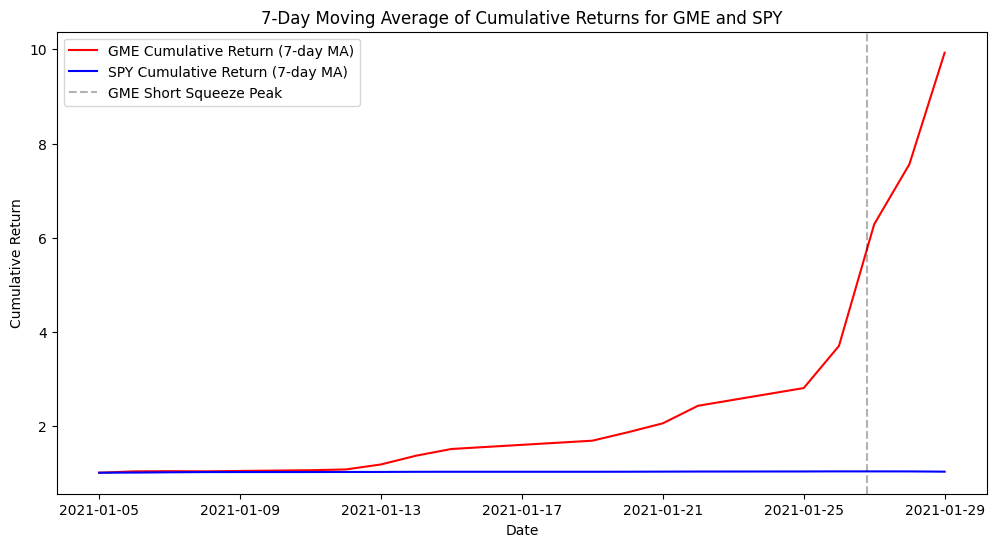

GME真实累计收益: 18.84x
SPY真实累计收益: 1.00x
Alpha:  0.24566729770379545
Beta:  -28.998917060388344


C:\Users\Asus\AppData\Local\Temp\ipykernel_2544\781547271.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"GME真实累计收益: {(1 + returns['GME']).cumprod()[-1]:.2f}x")
C:\Users\Asus\AppData\Local\Temp\ipykernel_2544\781547271.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"SPY真实累计收益: {(1 + returns['SPY']).cumprod()[-1]:.2f}x")


In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.dates import date2num

returns = pd.concat([gme_history['Daily_Return'], spy_history['Daily_Return']], axis = 1).dropna()
returns.columns = ['GME','SPY']
returns.index = pd.to_datetime(returns.index) # 这样修改后应该可以解决你的错误。如果 returns.index 不是 datetime 类型，你可能还需要先确保索引是 datetime 类型：

# setup x as benchmark and y (stock)

X = sm.add_constant(returns['SPY']) # adds intercept term
y = returns['GME']

# run linear regression
model = sm.OLS(y, X).fit()

# Get predictions (fitted values)
predicted_gme = model.predict(X)

# get alpha (intercept)
alpha = model.params['const'] # 'const' for ALPHA

# get beta
beta = model.params['SPY'] # 'SPY' for BETA

gme_raw = (1 + returns['GME']).cumprod()
spy_raw = (1 + returns['SPY']).cumprod()
gme_ma7 = gme_raw.rolling(window=7, min_periods=1).mean()
spy_ma7 = spy_raw.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(returns.index, gme_ma7, label="GME Cumulative Return (7-day MA)", color='red')
plt.plot(returns.index, spy_ma7, label="SPY Cumulative Return (7-day MA)", color='blue')
plt.title("7-Day Moving Average of Cumulative Returns for GME and SPY")
event_date = pd.to_datetime('2021-01-27')
plt.axvline(x=event_date, color='black', linestyle='--', alpha=0.3, label='GME Short Squeeze Peak')
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

print(f"GME真实累计收益: {(1 + returns['GME']).cumprod()[-1]:.2f}x")
print(f"SPY真实累计收益: {(1 + returns['SPY']).cumprod()[-1]:.2f}x")
print("Alpha: ", alpha)
print("Beta: ", beta)

# 5. Market Manipulation Indicators Analysis (Advanced)

In [47]:
gme_shares_outstanding = 447_300_000 # Retrieve manually from https://finance.yahoo.com/quote/GME/key-statistics/

gme_history['Turnover_Rate'] = gme_history['Volume'] / gme_shares_outstanding
gme_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Turnover_Rate
Date,,,,,,,,,
2021-01-05 00:00:00-05:00,4.337500,4.520000,4.307500,4.342500,19846000,0.0,0.0,0.006957,0.044368
2021-01-06 00:00:00-05:00,4.335000,4.745000,4.332500,4.590000,24224800,0.0,0.0,0.056995,0.054158
2021-01-07 00:00:00-05:00,4.617500,4.862500,4.505000,4.520000,24517200,0.0,0.0,-0.015251,0.054812
2021-01-08 00:00:00-05:00,4.545000,4.575000,4.270000,4.422500,25928000,0.0,0.0,-0.021571,0.057966
2021-01-11 00:00:00-05:00,4.852500,5.162500,4.752500,4.985000,59632000,0.0,0.0,0.127190,0.133315
2021-01-12 00:00:00-05:00,4.990000,5.100000,4.830000,4.987500,28242800,0.0,0.0,0.000502,0.063141
2021-01-13 00:00:00-05:00,5.105000,9.662500,5.007500,7.850000,578006800,0.0,0.0,0.573935,1.292213
2021-01-14 00:00:00-05:00,9.522500,10.765000,8.262500,9.977500,374869600,0.0,0.0,0.271019,0.838072
2021-01-15 00:00:00-05:00,9.622500,10.187500,8.502500,8.875000,187465600,0.0,0.0,-0.110499,0.419105


# 🧠 Interpretation:
If the turnover rate > 100%, it means more shares were traded than actually exist — a possible sign of:

* High speculative activity

* Possible short squeeze

* Market manipulation concerns